# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [2]:
!pip install sklearn

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post10-py3-none-any.whl size=2959 sha256=8b8aa2e0704b3b8f12ca338e696839592cb6f9cf99691d10d7d0b3ca60d0920e
  Stored in directory: /root/.cache/pip/wheels/5b/f6/92/0173054cc528db7ffe7b0c7652a96c3102aab156a6da960387
Successfully built sklearn


In [3]:
!pip install palmerpenguins
from palmerpenguins import load_penguins

In [4]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [5]:
# Checking for NA
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [6]:
# Dropping NA values
penguins = penguins.dropna()

In [7]:
import pandas as pd

# Creating dummy variables and creating a reference variable for each
penguins_new = pd.get_dummies(penguins, columns=['species', 'island', 'sex'], drop_first=True)
penguins_new.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_male
0,39.1,18.7,181.0,3750.0,2007,0,0,0,1,1
1,39.5,17.4,186.0,3800.0,2007,0,0,0,1,0
2,40.3,18.0,195.0,3250.0,2007,0,0,0,1,0
4,36.7,19.3,193.0,3450.0,2007,0,0,0,1,0
5,39.3,20.6,190.0,3650.0,2007,0,0,0,1,1


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

*1 Variable*

In [28]:
# Importing libraries
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [39]:
# Model 1: Using only 'bill_length_mm' as the predictor
X1 = penguins_new[['bill_length_mm']]
y = penguins_new['bill_depth_mm']
model_1 = LinearRegression().fit(X1, y)

*3 Variables*

In [40]:
# Model 2: Using 'bill_length_mm', 'flipper_length_mm', 'body_mass_g' as predictors
X2 = penguins_new[['bill_length_mm', 'flipper_length_mm', 'body_mass_g']]
model_3 = LinearRegression().fit(X2, y)

*3 Variables + species dummy variables*

In [41]:
# Model 3: Using 'bill_length_mm', 'flipper_length_mm', 'body_mass_g', and species dummies as predictors
X3_columns = ['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'species_Chinstrap', 'species_Gentoo']
X3 = penguins_new[X3_columns]
model_3 = LinearRegression().fit(X3, y)

*All Variables*

In [42]:
# Model 4: Using all the variables, including the dummy variables, as predictors
X4 = penguins_new.drop(columns=['bill_depth_mm'])
model_4 = LinearRegression().fit(X4, y)

Splitting into test and train data

In [45]:
# Defining the train and test response variable
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(penguins_new, test_size=0.25)

y_train = train_data['bill_depth_mm']
y_test = test_data['bill_depth_mm']

In [47]:
# Defining the predictor sets for the four models
X1_train = train_data[['bill_length_mm']]
X2_train = train_data[['bill_length_mm', 'flipper_length_mm', 'body_mass_g']]
X3_train = train_data[['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'species_Chinstrap', 'species_Gentoo']]
X4_train = train_data.drop(columns=['bill_depth_mm'])

X1_test = test_data[['bill_length_mm']]
X2_test = test_data[['bill_length_mm', 'flipper_length_mm', 'body_mass_g']]
X3_test = test_data[['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'species_Chinstrap', 'species_Gentoo']]
X4_test = test_data.drop(columns=['bill_depth_mm'])

# Training the models and calculating the training and test errors
models = [LinearRegression() for _ in range(4)]
X_train_list = [X1_train, X2_train, X3_train, X4_train]
X_test_list = [X1_test, X2_test, X3_test, X4_test]
train_errors, test_errors = [], []

for i, model in enumerate(models):
    model.fit(X_train_list[i], y_train)
    train_errors.append(mean_squared_error(y_train, model.predict(X_train_list[i])))
    test_errors.append(mean_squared_error(y_test, model.predict(X_test_list[i])))

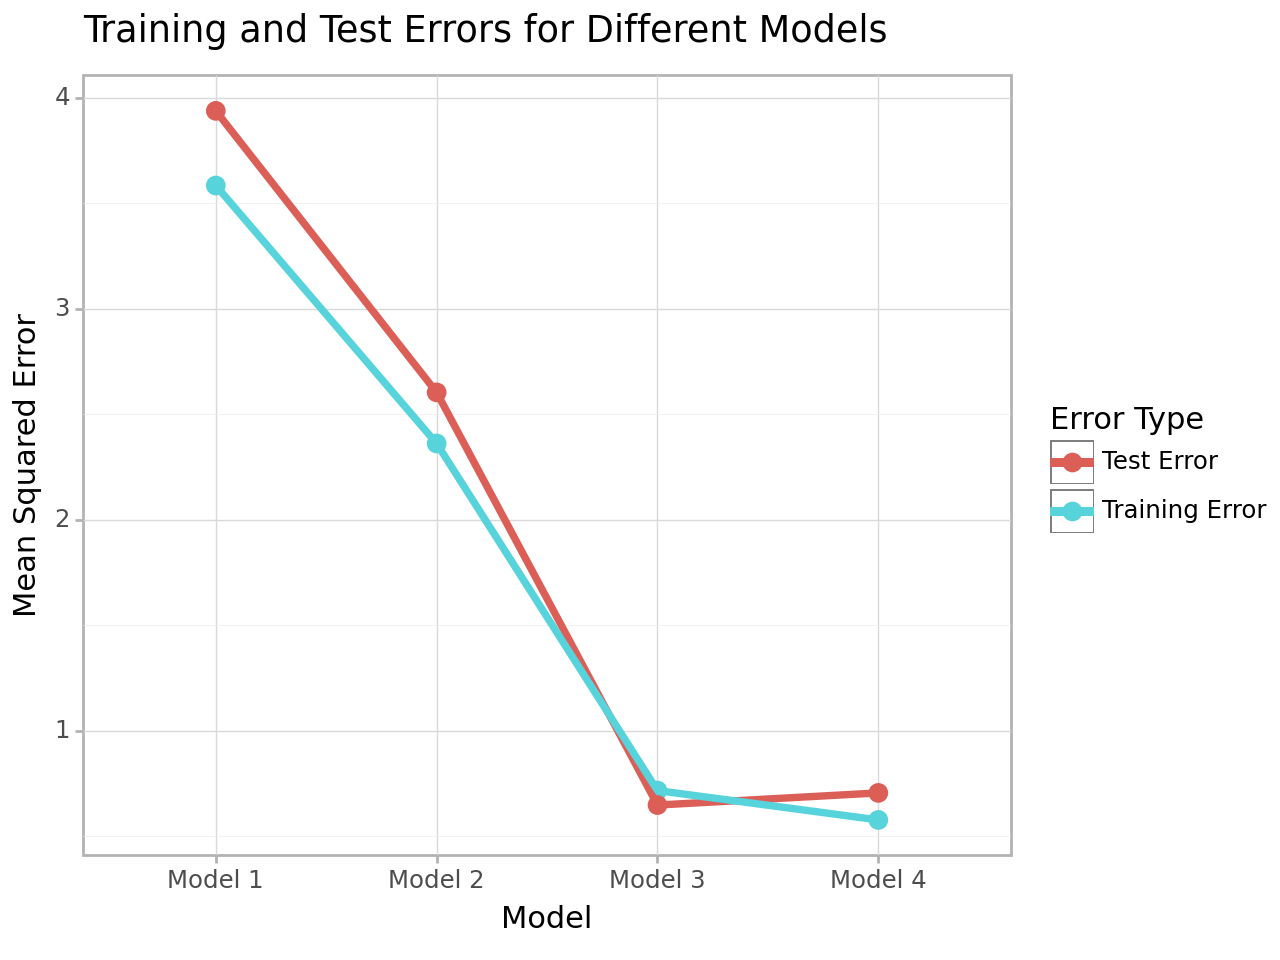

In [53]:
from plotnine import ggplot, aes, geom_point, geom_line, labs, theme_light

# Creating a dataframe to hold the errors for plotting
error_data = pd.DataFrame({
    'Model': ['Model 1', 'Model 2', 'Model 3', 'Model 4'] * 2,
    'Error Type': ['Training Error'] * 4 + ['Test Error'] * 4,
    'Error': train_errors + test_errors
})

# Plotting with plotnine
plot = (ggplot(error_data, aes(x='Model', y='Error', color='Error Type', group='Error Type')) +
        geom_point(size=3) +
        geom_line(size=1.5) +
        labs(title='Training and Test Errors for Different Models', y='Mean Squared Error') +
        theme_light()
       )

print(plot)

From the plot, we can see that Model 1 and Model 2 have significantly higher test errors than Model 3 & 4. Model 3 had a slightly lower mean squared error than Model 4, although Model 4 included all the variables in the dataset. Therefore, Model 3 performed the best.

Just by adding the dummy variables for species in Model 3, the mean squared error improved significantly from just having bill_length_mm, flipper_length_mm, and body_mass_g as variables in Model 2.